In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_weekly = pd.read_csv('weekly-rbipayments-RTGS.csv', parse_dates=['Date'], dayfirst=True,index_col='Date')

In [ ]:
data_weekly

,Weekly NEFT Volume
Date,
2020-06-01,663.86803
2020-06-08,489.97344
2020-06-15,447.36558
2020-06-22,419.99947
2020-06-29,714.07521
...,...
2021-09-06,767.83486
2021-09-13,680.17971
2021-09-20,633.89612


In [ ]:
data_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2020-06-01 to 2021-10-04
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekly NEFT Volume  71 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


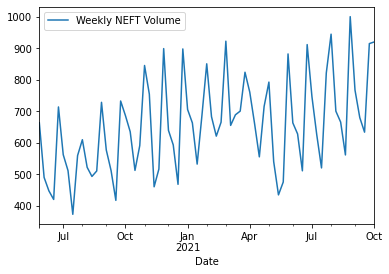

In [ ]:
data_weekly.plot()

In [ ]:
# Optional 
# insert nans forcefully into columns in a dataframe using below sample code and calculate RMSE for each interpolation method

# You can choose the interpolation technique that yields lowest RMSE
data_testing = data_weekly.copy()

In [ ]:
for col in data_testing.columns:
    data_testing.loc[data_testing.sample(frac=0.25,random_state=1).index, col] = np.nan

In [ ]:
data_testing.isnull().sum()

Weekly NEFT Volume    18
dtype: int64

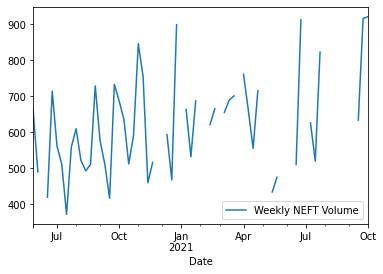

In [ ]:
data_testing.plot()

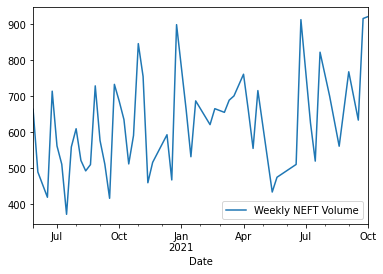

In [ ]:
data_testing.interpolate(method='linear').plot()

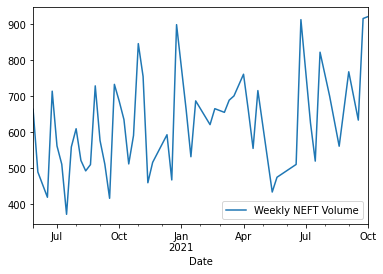

In [ ]:
data_testing.interpolate(method='time').plot()

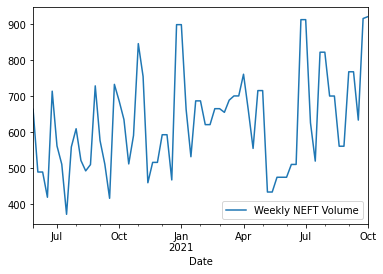

In [ ]:
data_testing.interpolate(method='nearest').plot()

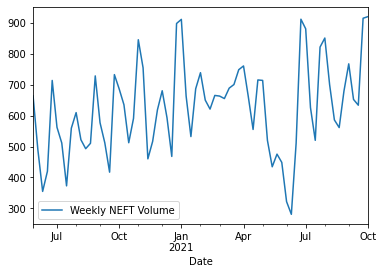

In [ ]:
data_testing.interpolate(method='polynomial' , order = 2).plot()

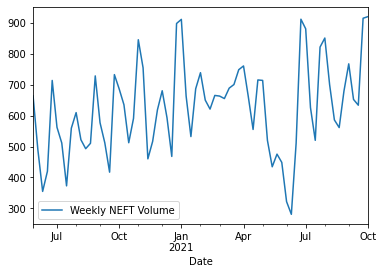

In [ ]:
data_testing.interpolate(method='quadratic').plot()


In [ ]:
data_testing['original'] = data_weekly['Weekly NEFT Volume']

In [ ]:
data_testing

,Weekly NEFT Volume,original
Date,,
2020-06-01,663.86803,663.86803
2020-06-08,489.97344,489.97344
2020-06-15,NaN,447.36558
2020-06-22,419.99947,419.99947
2020-06-29,714.07521,714.07521
...,...,...
2021-09-06,767.83486,767.83486
2021-09-13,NaN,680.17971
2021-09-20,633.89612,633.89612


In [ ]:
data_testing['linear'] = data_testing['Weekly NEFT Volume'].interpolate(method='linear')

data_testing['time'] = data_testing['Weekly NEFT Volume'].interpolate(method='time')

data_testing['nearest'] = data_testing['Weekly NEFT Volume'].interpolate(method='nearest')

data_testing['quadratic'] = data_testing['Weekly NEFT Volume'].interpolate(method='quadratic')

data_testing['poly2'] = data_testing['Weekly NEFT Volume'].interpolate(method='polynomial', order = 2)

data_testing['spline'] = data_testing['Weekly NEFT Volume'].interpolate(method='spline', order = 2)

In [ ]:
data_testing

,Weekly NEFT Volume,original,linear,time,nearest,quadratic,poly2,spline
Date,,,,,,,,
2020-06-01,663.86803,663.86803,663.868030,663.868030,663.86803,663.868030,663.868030,663.868030
2020-06-08,489.97344,489.97344,489.973440,489.973440,489.97344,489.973440,489.973440,489.973440
2020-06-15,NaN,447.36558,454.986455,454.986455,489.97344,354.783418,354.783418,355.933801
2020-06-22,419.99947,419.99947,419.999470,419.999470,419.99947,419.999470,419.999470,419.999470
2020-06-29,714.07521,714.07521,714.075210,714.075210,714.07521,714.075210,714.075210,714.075210
...,...,...,...,...,...,...,...,...
2021-09-06,767.83486,767.83486,767.834860,767.834860,767.83486,767.834860,767.834860,767.834860
2021-09-13,NaN,680.17971,700.865490,700.865490,767.83486,652.598521,652.598521,653.048869
2021-09-20,633.89612,633.89612,633.896120,633.896120,633.89612,633.896120,633.896120,633.896120


In [ ]:
import statsmodels.tools.eval_measures as em

In [ ]:
for i in data_testing.columns[2:]:
    print(i,':',em.rmse(data_testing[i], data_testing['original']))

linear : 94.54559660638145
time : 94.54559660638145
nearest : 104.60504894891916
quadratic : 105.36044888250848
poly2 : 105.36044888250848
spline : 105.35115051008803


In [ ]:
# Best Interpolation method is linear/time

In [ ]:
# Outlier Detection & Imputation

#!pip install hampel

from hampel import hampel

In [ ]:
hampel(data_weekly['Weekly NEFT Volume'], window_size=5, n=3)

[13, 39]

In [ ]:
!pip install neuralprophet[live] -q

In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np

In [ ]:
data_weekly = pd.read_csv('weekly-rbipayments-RTGS.csv', parse_dates=['Date'], dayfirst=True)

In [ ]:
data_weekly

,ds,y
0,2020-06-01,663.86803
1,2020-06-08,489.97344
2,2020-06-15,447.36558
3,2020-06-22,419.99947
4,2020-06-29,714.07521
...,...,...
66,2021-09-06,767.83486
67,2021-09-13,680.17971
68,2021-09-20,633.89612
69,2021-09-27,915.47533


In [ ]:
df = data_weekly.rename(columns = {'Date' : 'ds' , 'Weekly NEFT Volume' : 'y'})

In [ ]:
df.head()

,ds,y
0,2020-06-01,663.86803
1,2020-06-08,489.97344
2,2020-06-15,447.36558
3,2020-06-22,419.99947
4,2020-06-29,714.07521


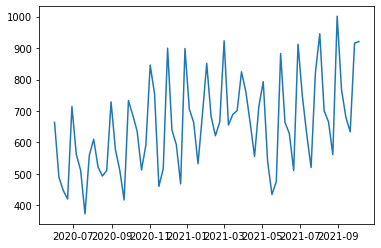

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['ds'], df['y'])

In [ ]:
#model Configuration
model = NeuralProphet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False,
                      batch_size=32, collect_metrics=True,loss_func='MSE')

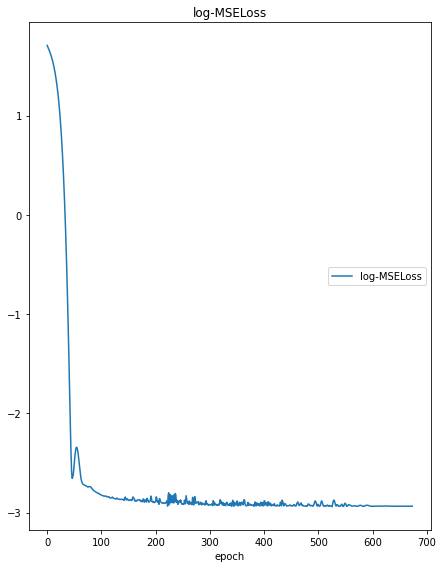

log-MSELoss
	log-MSELoss      	 (min:   -2.940, max:    1.706, cur:   -2.934)


In [ ]:

metrics = model.fit(df,progress= 'plot')


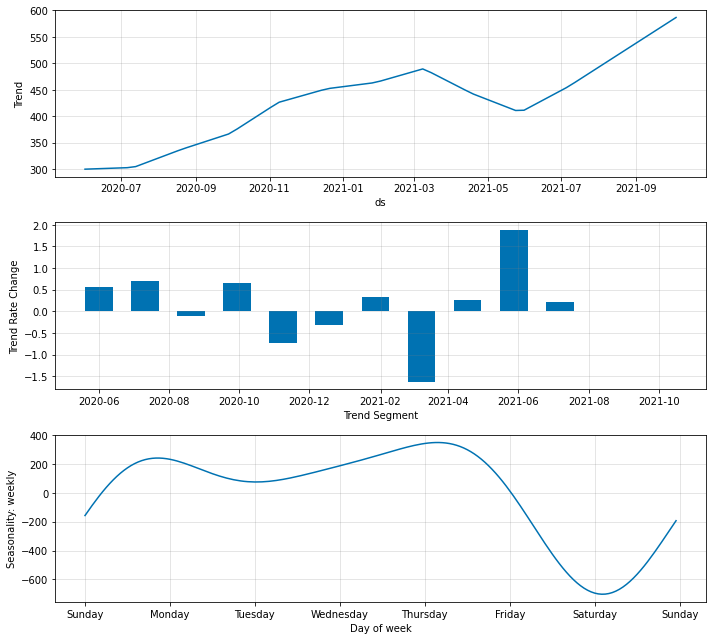

In [ ]:
fig_param = model.plot_parameters()

In [ ]:
metrics

,MSELoss,MAE,RMSE,RegLoss
0,5.504644,1265.576636,1284.855006,0.0
1,5.435422,1257.431943,1277.311013,0.0
2,5.365797,1249.193303,1268.443370,0.0
3,5.294611,1240.715177,1260.523709,0.0
4,5.221534,1231.954973,1251.769377,0.0
...,...,...,...,...
669,0.053164,104.813834,125.854549,0.0
670,0.053164,104.813659,125.612785,0.0
671,0.053163,104.813556,125.059774,0.0
672,0.053163,104.813472,125.605752,0.0


In [ ]:
df.tail()

,ds,y
66,2021-09-06,767.83486
67,2021-09-13,680.17971
68,2021-09-20,633.89612
69,2021-09-27,915.47533
70,2021-10-04,920.65351


In [ ]:
future = model.make_future_dataframe(df, periods=10, n_historic_predictions=len(df))
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 98.592% of the data.
INFO:NP.df_utils:Major frequency W-MON corresponds to 98.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-MON
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-MON
INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 98.765% of the data.
INFO:NP.df_utils:Major frequency W-MON corresponds to 98.765% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-MON
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-MON
INFO - (NP.df_utils._infer_frequency) - Major frequency W-MON corresponds to 98.765% of the data.
INFO:NP.df_utils:Major frequency W-MON corresponds to 98.765% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-MON
INFO:NP.df_utils:Defined frequency is equal to major freq

In [ ]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly
76,2021-11-15,NaN,880.653076,NaN,648.273560,232.379532
77,2021-11-22,NaN,890.903259,NaN,658.523743,232.379532
78,2021-11-29,NaN,901.153503,NaN,668.773926,232.379532
79,2021-12-06,NaN,911.403748,NaN,679.024231,232.379532
80,2021-12-13,NaN,921.654053,NaN,689.274536,232.379532


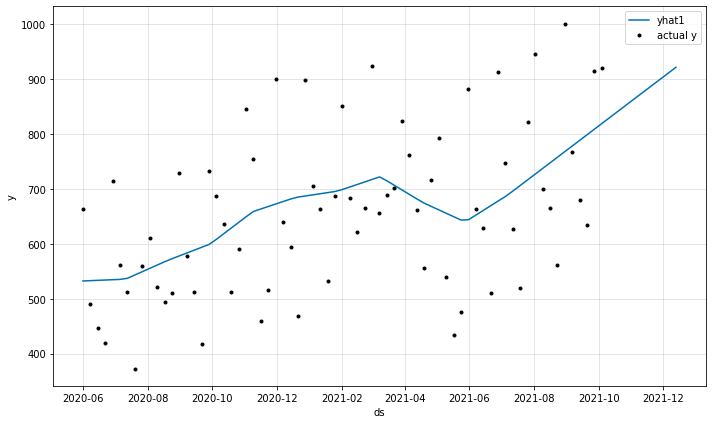

In [ ]:
plot1 = model.plot(forecast)